### K Nearest Neighbors

&nbsp;

K nearest neighbors is the easiest machine learning algorithm. No linear algebra, no calculus, no convex optimization. All it needs is Euclidean distance, something you learned from geometry a long while ago. It works well with small dataset in terms of both dimensions and amount. It is highly sensitive to outliers and it doesn't function well when facing large dataset or categorical dataset.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#to forecast the label of a data point
#we compute its euclidean distance from all training data
#we select k nearest neighbors (smallest distance)
#each neighbor has a label
#the one with the most votes will be the prediction
def voting(train,datapoint,xcol,k):
    
    #compute euclidean distance
    distance=train[xcol]-datapoint
    distance['euclidean distance']=[sum([j**2 for j in distance.loc[i]])**0.5 for i in range(len(distance))]

    distance['y']=train['y']
    
    #find k nearest neighbors
    distance=distance.sort_values(by='euclidean distance')
    votes=distance['y'].iloc[:k]
    
    #voting
    vote=None
    num=-1
    for i in set(votes):
        if votes.tolist().count(i)>num:
            num=votes.tolist().count(i)
            vote=i
            
    return vote

In [3]:
#knn self implementation
def knn(train,test,k,xcol):
    
    train['predict']=None

    test['predict']=None

    for i in range(len(train)):
        datapoint=train[xcol].loc[i]
        train.at[i,'predict']=voting(train,datapoint,xcol,k)

    for i in range(len(test)):
        datapoint=test[xcol].loc[i]
        test.at[i,'predict']=voting(train,datapoint,xcol,k)

    print('\ntrain accuracy: %s'%(len(train[train['y']==train['predict']])/len(train)))
    print('\ntest accuracy: %s'%(len(test[test['y']==test['predict']])/len(test)))

In [4]:
#official sklearn knn
def skl_knn(train,test,xcol,ycol,k):

    clf=KNeighborsClassifier(n_neighbors=k).fit(train[xcol],train[ycol])
    print('\ntrain accuracy: %s'%(clf.score(train[xcol],train[ycol])))
    print('\ntest accuracy: %s'%(clf.score(test[xcol],test[ycol])))

In [5]:
xcol=['x0','x1','x2','x3']
ycol='y'

In [6]:
iris=load_iris()

df=pd.DataFrame(iris.data,columns=xcol)

#each input factor has to be float/int
#sklearn has already done that for us
#but if you are using the dataset inside the repository
#you can use np.unique to convert categorical data to int
df[ycol]=iris.target

In [7]:
x_train,x_test,y_train,y_test=train_test_split(df[xcol],df[ycol])

train=pd.concat([x_train,y_train],axis=1)
train.reset_index(inplace=True,drop=True)
    
test=pd.concat([x_test,y_test],axis=1)
test.reset_index(inplace=True,drop=True)

In [8]:
#the conventional way to select k
#take the square root of the amount of data points
#preferably an odd number
#another way is to iterate through different numbers
#to find an optimal k that achieves the best accuracy
#as it is computational expensive
#i wont implement it here
potential=int(len(train)**0.5)
k=potential if potential%2!=0 else potential-1

In [9]:
#even though the algorithm is naïve
#it turns out to be quite effective
knn(train,test,k,xcol)


train accuracy: 0.9642857142857143

test accuracy: 1.0


In [10]:
skl_knn(train,test,xcol,ycol,k)


train accuracy: 0.9642857142857143

test accuracy: 1.0


&nbsp;
### A Showcase of How KNN Works
&nbsp;

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [12]:
#dimensions reduce to 2 so we can plot a 2d figure
#you can check more about pca in the link below
# https://github.com/je-suis-tm/machine-learning/blob/master/principal%20component%20analysis.ipynb
X=PCA(2).fit_transform(train[xcol])

train['dim1']=X[:,0]
train['dim2']=X[:,1]

#randomly select one data point
datapoint=train[['dim1','dim2']].iloc[20]

In [13]:
#compute euclidean distance then select k nearest neighbors
distance=train[['dim1','dim2']]-datapoint
distance['euclidean distance']=[sum([j**2 for j in distance.loc[i]])**0.5 for i in range(len(distance))]
distance=distance.sort_values(by='euclidean distance')

#why 1 to k+1?
#becuz we are using training dataset
#we need to exclude itself
#technically we should do the same when we calculate train accuracy
votes=distance.iloc[1:k+1]

&nbsp;

In the following figure, different colors imply different labels. Apparently in our case, the yellow label dominates the votes. The label of the testing data point should be purple as well.

&nbsp;

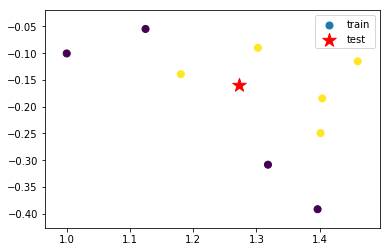

In [14]:
plt.scatter(train['dim1'].loc[votes.index],
            train['dim2'].loc[votes.index],
            c=train['y'].loc[votes.index],s=50,label='train')
plt.scatter(datapoint[0],datapoint[1],
            marker='*',c='r',s=200,label='test')
plt.legend(loc=0)
plt.show()